In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 25s 2us/step


In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
'标签字典'
label_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
              5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

def plot_images_lables_prediction(images_list, labels_list, prediction_list, # 图像，标签， 预测值
                                  index=0,      # 开始指针
                                  num=10, num_max=25):    # 设置显示图的数量
    
    fig = plt.gcf()  #  获取当前图表 get current figure
    fig.set_size_inches(32, 32)  #  1 inches = 2.54 cm
    if num > num_max:
        num = num_max
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images_list[index], cmap='binary')
        title = str(index) + ': ' + label_dict[int(labels_list[index])]
        if len(prediction_list) > 0:
            title += '= >' + str(prediction_list[index])
        ax.set_title(title, fontsize=30)
        ax.set_xticks([])   # 不显示x坐标轴
        ax.set_yticks([])   # 不显示y坐标轴
        index += 1
    plt.show()

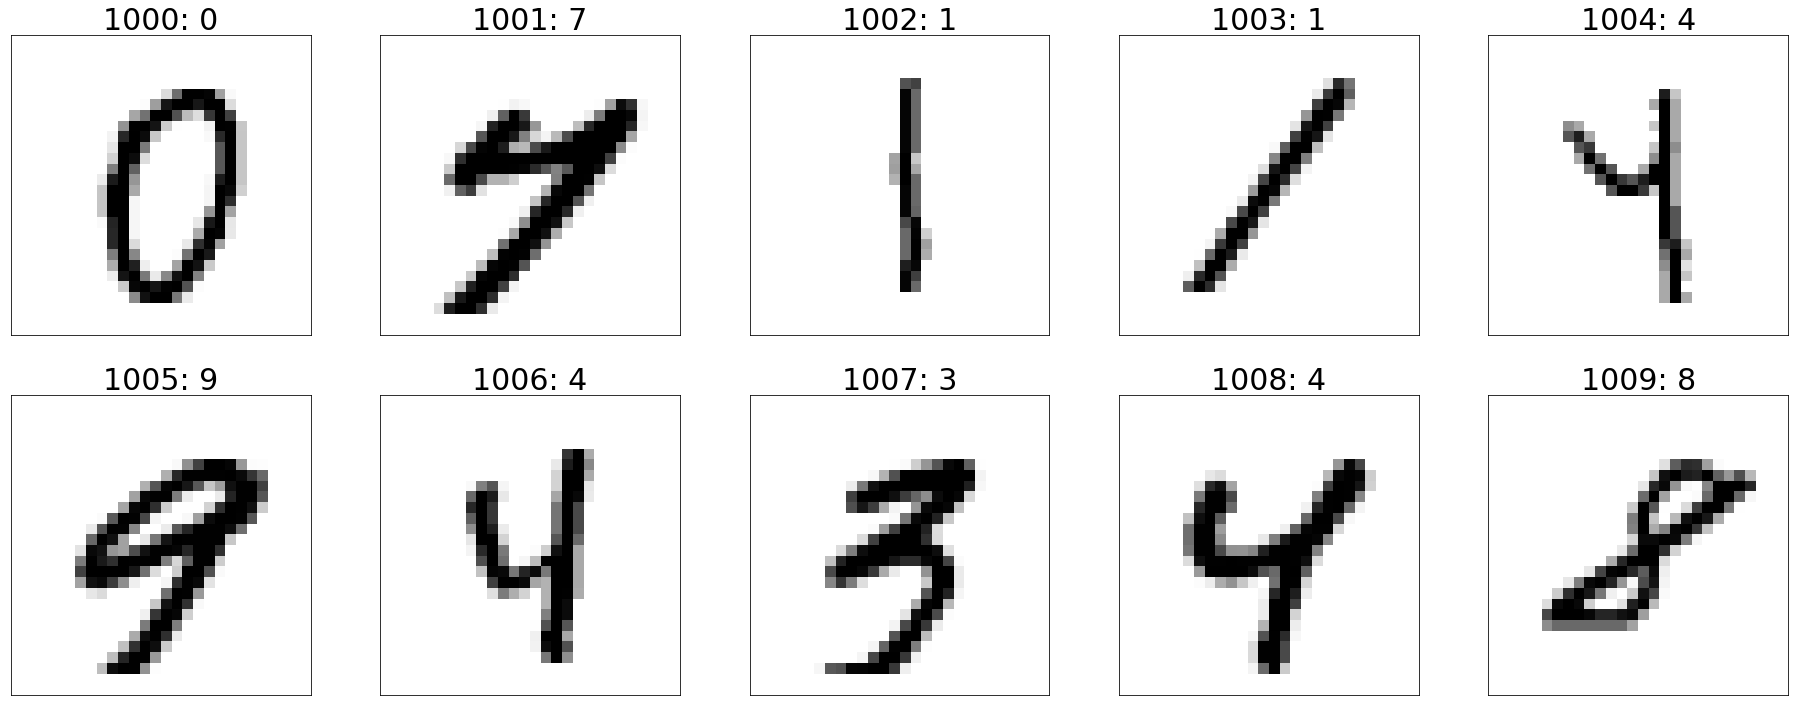

In [5]:
plot_images_lables_prediction(x_train, y_train, [], index=1000, num=10, num_max=25)

### 用于全连接网络

In [0]:
import numpy as np

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

### 用于卷积网络

In [0]:
import numpy as np
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

### 用于循环网络

In [0]:
import numpy as np

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

### 全连接网络

In [7]:
from keras import regularizers
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(28*28)))  # <<------------------------
model.add(layers.Dropout(0.5))
# keras.layers.Dropout(rate, noise_shape=None, seed=None)

model.add(layers.Dense(512, activation='relu', ))  
model.add(layers.Dropout(0.5))    # <<------------------------

model.add(layers.Dense(10, activation='softmax'))  # <<------------------------

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [0]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-5)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


model_checkpoint = ModelCheckpoint('mnist_model_1.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

# callbacks = [model_checkpoint, reduce_lr]

In [10]:
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 87us/step - loss: 0.3640 - acc: 0.8863 - val_loss: 0.1342 - val_acc: 0.9594

Epoch 00001: val_acc improved from -inf to 0.95942, saving model to mnist_model_1.h5
Epoch 2/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.1774 - acc: 0.9479 - val_loss: 0.1102 - val_acc: 0.9683

Epoch 00002: val_acc improved from 0.95942 to 0.96833, saving model to mnist_model_1.h5
Epoch 3/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1405 - acc: 0.9597 - val_loss: 0.0981 - val_acc: 0.9731

Epoch 00003: val_acc improved from 0.96833 to 0.97308, saving model to mnist_model_1.h5
Epoch 4/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.1252 - acc: 0.9651 - val_loss: 0.0937 - val_acc: 0.9756

Epoch 00004: val_acc improved from 0.97308 to 0.97558, saving model to mnist_model_1.

In [0]:
from keras.models import load_model
model = load_model('mnist_model_1.h5')

In [12]:
model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 13us/step


[0.10652298009670341, 0.9847]

In [13]:
from keras import regularizers
from keras import models, layers

# kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01)
# keras.regularizers.l1_l2(l1=0.01, l2=0.01)
# model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(28*28),  
                       kernel_regularizer=regularizers.l2(1e-6),    # <<------------------------
                       activity_regularizer=regularizers.l2(1e-6))) # <<------------------------
model.add(layers.Dropout(0.5))
# keras.layers.Dropout(rate, noise_shape=None, seed=None)

model.add(layers.Dense(512, activation='relu', 
                       kernel_regularizer=regularizers.l2(1e-6), 
                       activity_regularizer=regularizers.l2(1e-6)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_checkpoint = ModelCheckpoint('mnist_model_2.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 40us/step - loss: 0.3813 - acc: 0.8904 - val_loss: 0.1475 - val_acc: 0.9625

Epoch 00001: val_acc improved from -inf to 0.96250, saving model to mnist_model_2.h5
Epoch 2/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1861 - acc: 0.9507 - val_loss: 0.1216 - val_acc: 0.9688

Epoch 00002: val_acc improved from 0.96250 to 0.96883, saving model to mnist_model_2.h5
Epoch 3/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1482 - acc: 0.9616 - val_loss: 0.1135 - val_acc: 0.9708

Epoch 00003: val_acc improved from 0.96883 to 0.97083, saving model to mnist_model_2.h5
Epoch 4/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1311 - acc: 0.9654 - val_loss: 0.1066 - val_acc: 0.9731

Epoch 00004: val_acc improved from 0.97083 to 0.97308, saving model to mnist_model_2.h5
Epoch 5/100
48000/48000 [====================

In [15]:
from keras.models import load_model
model = load_model('mnist_model_2.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 16us/step


[0.08724314426928759, 0.9823]

In [16]:
from keras import regularizers
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(28*28)))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_checkpoint = ModelCheckpoint('mnist_model_3.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.2510 - acc: 0.9223 - val_loss: 0.1067 - val_acc: 0.9677

Epoch 00001: val_acc improved from -inf to 0.96775, saving model to mnist_model_3.h5
Epoch 2/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.0905 - acc: 0.9723 - val_loss: 0.0981 - val_acc: 0.9706

Epoch 00002: val_acc improved from 0.96775 to 0.97058, saving model to mnist_model_3.h5
Epoch 3/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.0582 - acc: 0.9821 - val_loss: 0.0947 - val_acc: 0.9737

Epoch 00003: val_acc improved from 0.97058 to 0.97367, saving model to mnist_model_3.h5
Epoch 4/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.0406 - acc: 0.9873 - val_loss: 0.0953 - val_acc: 0.9761

Epoch 00004: val_acc improved from 0.97367 to 0.97608, saving model to mnist_model_3.h5
Epoch 5/100
48000/48000 [====================

In [18]:
from keras.models import load_model
model = load_model('mnist_model_3.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 17us/step


[0.14357016448011747, 0.985]

### 卷积网络

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [21]:
'实例化一个小型的卷积神经网络'
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   # <<------------------------
model.add(layers.MaxPooling2D((2, 2)))                    # <<------------------------
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

'在卷积神经网络上添加分类器'
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               295168    
__________

In [22]:
model_checkpoint = ModelCheckpoint('mnist_model_4.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 122us/step - loss: 0.2250 - acc: 0.9277 - val_loss: 0.0625 - val_acc: 0.9822

Epoch 00001: val_acc improved from -inf to 0.98225, saving model to mnist_model_4.h5
Epoch 2/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0396 - val_acc: 0.9892

Epoch 00002: val_acc improved from 0.98225 to 0.98917, saving model to mnist_model_4.h5
Epoch 3/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.0327 - acc: 0.9897 - val_loss: 0.0599 - val_acc: 0.9817

Epoch 00003: val_acc did not improve from 0.98917
Epoch 4/100
48000/48000 [==============================] - 2s 46us/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0399 - val_acc: 0.9892

Epoch 00004: val_acc improved from 0.98917 to 0.98925, saving model to mnist_model_4.h5
Epoch 5/100
48000/48000 [==============================] - 2s 47us/step - loss: 0.

In [23]:
from keras.models import load_model
model = load_model('mnist_model_4.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 30us/step


[0.052499346948605696, 0.9938]

In [24]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())                    # <<------------------------
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())                    # <<------------------------
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())                    # <<------------------------

'在卷积神经网络上添加分类器'
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [25]:
model_checkpoint = ModelCheckpoint('mnist_model_5.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 84us/step - loss: 0.1330 - acc: 0.9602 - val_loss: 0.0815 - val_acc: 0.9777

Epoch 00001: val_acc improved from -inf to 0.97767, saving model to mnist_model_5.h5
Epoch 2/100
48000/48000 [==============================] - 3s 64us/step - loss: 0.0507 - acc: 0.9858 - val_loss: 0.0562 - val_acc: 0.9865

Epoch 00002: val_acc improved from 0.97767 to 0.98650, saving model to mnist_model_5.h5
Epoch 3/100
48000/48000 [==============================] - 3s 64us/step - loss: 0.0376 - acc: 0.9892 - val_loss: 0.0539 - val_acc: 0.9864

Epoch 00003: val_acc did not improve from 0.98650
Epoch 4/100
48000/48000 [==============================] - 3s 64us/step - loss: 0.0298 - acc: 0.9915 - val_loss: 0.0581 - val_acc: 0.9884

Epoch 00004: val_acc improved from 0.98650 to 0.98842, saving model to mnist_model_5.h5
Epoch 5/100
48000/48000 [==============================] - 3s 65us/step - loss: 0.0

In [26]:
from keras.models import load_model
model = load_model('mnist_model_5.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 47us/step


[0.051875687020049396, 0.994]

In [27]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())   # <<------------------------

model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [28]:
model_checkpoint = ModelCheckpoint('mnist_model_6.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 85us/step - loss: 0.1305 - acc: 0.9671 - val_loss: 0.0639 - val_acc: 0.9792

Epoch 00001: val_acc improved from -inf to 0.97917, saving model to mnist_model_6.h5
Epoch 2/100
48000/48000 [==============================] - 3s 62us/step - loss: 0.0418 - acc: 0.9879 - val_loss: 0.0444 - val_acc: 0.9858

Epoch 00002: val_acc improved from 0.97917 to 0.98583, saving model to mnist_model_6.h5
Epoch 3/100
48000/48000 [==============================] - 3s 61us/step - loss: 0.0289 - acc: 0.9912 - val_loss: 0.0501 - val_acc: 0.9836

Epoch 00003: val_acc did not improve from 0.98583
Epoch 4/100
48000/48000 [==============================] - 3s 61us/step - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0409 - val_acc: 0.9877

Epoch 00004: val_acc improved from 0.98583 to 0.98775, saving model to mnist_model_6.h5
Epoch 5/100
48000/48000 [==============================] - 3s 61us/step - loss: 0.0

In [29]:
from keras.models import load_model
model = load_model('mnist_model_6.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 1s 52us/step


[0.025630088351408654, 0.9943]

In [30]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
__________

In [31]:
model_checkpoint = ModelCheckpoint('mnist_model_7.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_split=0.2,
          callbacks = callbacks
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 12s 259us/step - loss: 0.1781 - acc: 0.9432 - val_loss: 0.3481 - val_acc: 0.9125

Epoch 00001: val_acc improved from -inf to 0.91250, saving model to mnist_model_7.h5
Epoch 2/100
48000/48000 [==============================] - 10s 213us/step - loss: 0.0475 - acc: 0.9855 - val_loss: 0.0677 - val_acc: 0.9789

Epoch 00002: val_acc improved from 0.91250 to 0.97892, saving model to mnist_model_7.h5
Epoch 3/100
48000/48000 [==============================] - 10s 213us/step - loss: 0.0324 - acc: 0.9902 - val_loss: 0.1055 - val_acc: 0.9677

Epoch 00003: val_acc did not improve from 0.97892
Epoch 4/100
48000/48000 [==============================] - 10s 213us/step - loss: 0.0259 - acc: 0.9920 - val_loss: 0.0635 - val_acc: 0.9817

Epoch 00004: val_acc improved from 0.97892 to 0.98167, saving model to mnist_model_7.h5
Epoch 5/100
48000/48000 [==============================] - 10s 215us/step -

In [32]:
from keras.models import load_model
model = load_model('mnist_model_7.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 1s 144us/step


[0.03298757810119462, 0.9947]

In [33]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 14, 14, 64)        256       
__________

In [34]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_8.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-5)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)   # <<------------------------

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 248us/step - loss: 0.1631 - acc: 0.9492 - val_loss: 0.5061 - val_acc: 0.8995

Epoch 00001: val_acc improved from -inf to 0.89950, saving model to mnist_model_8.h5
Epoch 2/100
60000/60000 [==============================] - 13s 211us/step - loss: 0.0432 - acc: 0.9869 - val_loss: 0.0320 - val_acc: 0.9905

Epoch 00002: val_acc improved from 0.89950 to 0.99050, saving model to mnist_model_8.h5
Epoch 3/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0295 - acc: 0.9906 - val_loss: 0.0596 - val_acc: 0.9812

Epoch 00003: val_acc did not improve from 0.99050
Epoch 4/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0227 - acc: 0.9930 - val_loss: 0.0459 - val_acc: 0.9894

Epoch 00004: val_acc did not improve from 0.99050
Epoch 5/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0189 - acc: 0.9940 - val_loss

In [35]:
from keras.models import load_model
model = load_model('mnist_model_8.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 1s 134us/step


[0.030105738508643502, 0.9954]

In [36]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 64)        256       
__________

In [37]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_9.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-5)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),  # <<------------------------
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 253us/step - loss: 0.1530 - acc: 0.9525 - val_loss: 0.1166 - val_acc: 0.9657

Epoch 00001: val_acc improved from -inf to 0.96570, saving model to mnist_model_9.h5
Epoch 2/100
60000/60000 [==============================] - 13s 211us/step - loss: 0.0415 - acc: 0.9875 - val_loss: 0.1235 - val_acc: 0.9654

Epoch 00002: val_acc did not improve from 0.96570
Epoch 3/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0310 - acc: 0.9903 - val_loss: 0.0524 - val_acc: 0.9836

Epoch 00003: val_acc improved from 0.96570 to 0.98360, saving model to mnist_model_9.h5
Epoch 4/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0223 - acc: 0.9931 - val_loss: 0.0765 - val_acc: 0.9782

Epoch 00004: val_acc did not improve from 0.98360
Epoch 5/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0185 - acc: 0.9942 - val_loss

In [38]:
from keras.models import load_model
model = load_model('mnist_model_9.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 2s 151us/step


[0.027285953699133596, 0.9964]

In [39]:
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_20 (Batc (None, 14, 14, 64)        256       
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=False,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

datagen.fit(x_train)

In [0]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_10.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)

early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-5)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=100)`
  


Epoch 1/100
468/468 [==============================] - 20s 43ms/step - loss: 0.1204 - acc: 0.9626 - val_loss: 0.0716 - val_acc: 0.9801

Epoch 00001: val_acc improved from -inf to 0.98010, saving model to mnist_model_10.h5
Epoch 2/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0497 - acc: 0.9846 - val_loss: 0.0477 - val_acc: 0.9850

Epoch 00002: val_acc improved from 0.98010 to 0.98500, saving model to mnist_model_10.h5
Epoch 3/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0339 - val_acc: 0.9903

Epoch 00003: val_acc improved from 0.98500 to 0.99030, saving model to mnist_model_10.h5
Epoch 4/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.1573 - val_acc: 0.9553

Epoch 00004: val_acc did not improve from 0.99030
Epoch 5/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0207 - val_acc: 0.9937

Epoch 

In [43]:
from keras.models import load_model
model = load_model('mnist_model_10.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 2s 178us/step


[0.010309792249285965, 0.9968]

In [44]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate

inputs = Input(shape=(28, 28, 1))
temp = inputs
x = Conv2D(16, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 28, 28, 16)   2320        conv2d_50[0][0]                  
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 17)   0           conv2d_51[0][0]                  
                                                                 input_1[0][0]                    
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=False,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

datagen.fit(x_train)

In [46]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_11.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=100)`


Epoch 1/100
468/468 [==============================] - 20s 42ms/step - loss: 0.1826 - acc: 0.9444 - val_loss: 0.3753 - val_acc: 0.8884

Epoch 00001: val_acc improved from -inf to 0.88840, saving model to mnist_model_11.h5
Epoch 2/100
468/468 [==============================] - 15s 32ms/step - loss: 0.0706 - acc: 0.9793 - val_loss: 0.0863 - val_acc: 0.9742

Epoch 00002: val_acc improved from 0.88840 to 0.97420, saving model to mnist_model_11.h5
Epoch 3/100
468/468 [==============================] - 15s 32ms/step - loss: 0.0511 - acc: 0.9853 - val_loss: 0.0796 - val_acc: 0.9752

Epoch 00003: val_acc improved from 0.97420 to 0.97520, saving model to mnist_model_11.h5
Epoch 4/100
468/468 [==============================] - 15s 31ms/step - loss: 0.0443 - acc: 0.9867 - val_loss: 0.0917 - val_acc: 0.9722

Epoch 00004: val_acc did not improve from 0.97520
Epoch 5/100
468/468 [==============================] - 15s 31ms/step - loss: 0.0379 - acc: 0.9885 - val_loss: 0.0513 - val_acc: 0.9852

Epoch 

In [47]:
from keras.models import load_model
model = load_model('mnist_model_11.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 2s 198us/step


[0.008916603633237537, 0.997]

In [48]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate

inputs = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = Conv2D(16, (1, 1), activation='relu')(x)

x1 = Conv2D(16, (1, 3), activation='relu')(inputs)
x1 = Conv2D(16, (3, 1), activation='relu')(x1)

x2 = Conv2D(16, (1, 1), activation='relu')(inputs)
x2 = Conv2D(16, (3, 3), activation='relu')(x2)

x = concatenate([x, x1, x2])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(32, (3, 3), activation='relu')(temp)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (1, 1), activation='relu')(x)

x1 = Conv2D(32, (1, 3), activation='relu')(temp)
x1 = Conv2D(32, (3, 1), activation='relu')(x1)
x1 = Conv2D(32, (3, 3), activation='relu')(x1)

x2 = Conv2D(32, (1, 1), activation='relu')(temp)
x2 = Conv2D(32, (3, 3), activation='relu')(x2)
x2 = Conv2D(32, (3, 3), activation='relu')(x2)
x = concatenate([x, x1, x2])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 26, 26, 16)   160         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 28, 26, 16)   64          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 28, 28, 16)   32          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_65 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=False,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

datagen.fit(x_train)

In [50]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_12.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=100)`


Epoch 1/100
468/468 [==============================] - 22s 46ms/step - loss: 0.1749 - acc: 0.9473 - val_loss: 0.1104 - val_acc: 0.9679

Epoch 00001: val_acc improved from -inf to 0.96790, saving model to mnist_model_12.h5
Epoch 2/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0673 - acc: 0.9804 - val_loss: 0.0648 - val_acc: 0.9794

Epoch 00002: val_acc improved from 0.96790 to 0.97940, saving model to mnist_model_12.h5
Epoch 3/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0501 - acc: 0.9859 - val_loss: 0.1611 - val_acc: 0.9539

Epoch 00003: val_acc did not improve from 0.97940
Epoch 4/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0416 - acc: 0.9882 - val_loss: 0.0205 - val_acc: 0.9939

Epoch 00004: val_acc improved from 0.97940 to 0.99390, saving model to mnist_model_12.h5
Epoch 5/100
468/468 [==============================] - 16s 34ms/step - loss: 0.0378 - acc: 0.9897 - val_loss: 0.0194 - val_acc: 0.9942

Epoch 

In [51]:
from keras.models import load_model
model = load_model('mnist_model_12.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 2s 246us/step


[0.01401617524717294, 0.9962]

In [52]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate

inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = Conv2D(32, (1, 1), activation='relu')(x)

x1 = Conv2D(32, (1, 3), activation='relu')(inputs)
x1 = Conv2D(32, (3, 1), activation='relu')(x1)

x2 = Conv2D(32, (1, 1), activation='relu')(inputs)
x2 = Conv2D(32, (3, 3), activation='relu')(x2)

x = concatenate([x, x1, x2])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(64, (3, 3), activation='relu')(temp)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (1, 1), activation='relu')(x)

x1 = Conv2D(64, (1, 3), activation='relu')(temp)
x1 = Conv2D(64, (3, 1), activation='relu')(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)

x2 = Conv2D(64, (1, 1), activation='relu')(temp)
x2 = Conv2D(64, (3, 3), activation='relu')(x2)
x2 = Conv2D(64, (3, 3), activation='relu')(x2)


x3 = Conv2D(64, (1, 1), activation='relu')(temp)
x3 = Conv2D(64, (5, 5), activation='relu')(x3)

x4 = Conv2D(64, (5, 5), activation='relu')(temp)
x4 = Conv2D(64, (1, 1), activation='relu')(x4)

x = concatenate([x, x1, x2, x3, x4])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(128, (3, 3), padding='same', activation='relu')(temp)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)

x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(temp)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)


x2 = Conv2D(128, (3, 1), padding='same', activation='relu')(temp)
x2 = Conv2D(128, (1, 3), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (3, 1), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (1, 3), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)

x = concatenate([x, x1, x2, temp])
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 26, 26, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 28, 26, 32)   128         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_88 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_85 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=False,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

datagen.fit(x_train)

In [54]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_13.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=100)`


Epoch 1/100
468/468 [==============================] - 30s 64ms/step - loss: 0.1375 - acc: 0.9583 - val_loss: 0.1052 - val_acc: 0.9724

Epoch 00001: val_acc improved from -inf to 0.97240, saving model to mnist_model_13.h5
Epoch 2/100
468/468 [==============================] - 22s 47ms/step - loss: 0.0579 - acc: 0.9821 - val_loss: 0.0477 - val_acc: 0.9851

Epoch 00002: val_acc improved from 0.97240 to 0.98510, saving model to mnist_model_13.h5
Epoch 3/100
468/468 [==============================] - 22s 47ms/step - loss: 0.0406 - acc: 0.9881 - val_loss: 0.0560 - val_acc: 0.9834

Epoch 00003: val_acc did not improve from 0.98510
Epoch 4/100
468/468 [==============================] - 22s 46ms/step - loss: 0.0369 - acc: 0.9889 - val_loss: 0.0326 - val_acc: 0.9888

Epoch 00004: val_acc improved from 0.98510 to 0.98880, saving model to mnist_model_13.h5
Epoch 5/100
468/468 [==============================] - 22s 47ms/step - loss: 0.0328 - acc: 0.9901 - val_loss: 0.0362 - val_acc: 0.9886

Epoch 

In [55]:
from keras.models import load_model
model = load_model('mnist_model_13.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 4s 367us/step


[0.012970936393890225, 0.9969]

### 循环神经网络

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [102]:
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, Activation, Dense, Input


model = Sequential()
#   https://keras.io/zh/layers/recurrent/

model.add(SimpleRNN(256,     # <<------------------------
    batch_input_shape=(None, 28, 28),
))


model.add(layers.Dense(10, activation='softmax')) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [106]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_14.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 350us/step - loss: 0.1671 - acc: 0.9504 - val_loss: 0.1487 - val_acc: 0.9541

Epoch 00001: val_acc improved from -inf to 0.95410, saving model to mnist_model_14.h5
Epoch 2/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.1300 - acc: 0.9613 - val_loss: 0.1197 - val_acc: 0.9649

Epoch 00002: val_acc improved from 0.95410 to 0.96490, saving model to mnist_model_14.h5
Epoch 3/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.1114 - acc: 0.9675 - val_loss: 0.0924 - val_acc: 0.9721

Epoch 00003: val_acc improved from 0.96490 to 0.97210, saving model to mnist_model_14.h5
Epoch 4/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.1043 - acc: 0.9688 - val_loss: 0.0825 - val_acc: 0.9753

Epoch 00004: val_acc improved from 0.97210 to 0.97530, saving model to mnist_model_14.h5
Epoch 5/100
60000/60000 [===========

In [107]:
from keras.models import load_model
model = load_model('mnist_model_14.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 5s 526us/step


[0.051839204063778746, 0.9873]

In [108]:
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, Activation, Dense, Input, GRU, LSTM, ConvLSTM2D, CuDNNGRU, CuDNNLSTM


model = Sequential()

model.add(LSTM(256,     # CuDNNLSTM   # <<------------------------
    batch_input_shape=(None, 28, 28),
))


model.add(layers.Dense(10, activation='softmax'))  

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [110]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_15.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 34s 567us/step - loss: 0.4490 - acc: 0.8513 - val_loss: 0.1928 - val_acc: 0.9412

Epoch 00001: val_acc improved from -inf to 0.94120, saving model to mnist_model_15.h5
Epoch 2/100
60000/60000 [==============================] - 21s 354us/step - loss: 0.1294 - acc: 0.9604 - val_loss: 0.1439 - val_acc: 0.9542

Epoch 00002: val_acc improved from 0.94120 to 0.95420, saving model to mnist_model_15.h5
Epoch 3/100
60000/60000 [==============================] - 21s 357us/step - loss: 0.0865 - acc: 0.9734 - val_loss: 0.0807 - val_acc: 0.9742

Epoch 00003: val_acc improved from 0.95420 to 0.97420, saving model to mnist_model_15.h5
Epoch 4/100
60000/60000 [==============================] - 22s 360us/step - loss: 0.0635 - acc: 0.9799 - val_loss: 0.0652 - val_acc: 0.9791

Epoch 00004: val_acc improved from 0.97420 to 0.97910, saving model to mnist_model_15.h5
Epoch 5/100
60000/60000 [========

In [111]:
from keras.models import load_model
model = load_model('mnist_model_15.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 6s 584us/step


[0.03754683790774143, 0.9907]

In [115]:
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, Activation, Dense, Input, GRU, LSTM, ConvLSTM2D, CuDNNGRU, CuDNNLSTM


model = Sequential()

model.add(GRU(256,                        # <<------------------------
    batch_input_shape=(None, 28, 28),
))


model.add(layers.Dense(10, activation='softmax'))  

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 256)               218880    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 221,450
Trainable params: 221,450
Non-trainable params: 0
_________________________________________________________________


In [116]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_16.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 32s 530us/step - loss: 0.4920 - acc: 0.8341 - val_loss: 0.1465 - val_acc: 0.9571

Epoch 00001: val_acc improved from -inf to 0.95710, saving model to mnist_model_16.h5
Epoch 2/100
60000/60000 [==============================] - 18s 301us/step - loss: 0.1225 - acc: 0.9623 - val_loss: 0.0896 - val_acc: 0.9720

Epoch 00002: val_acc improved from 0.95710 to 0.97200, saving model to mnist_model_16.h5
Epoch 3/100
60000/60000 [==============================] - 18s 301us/step - loss: 0.0773 - acc: 0.9765 - val_loss: 0.0761 - val_acc: 0.9760

Epoch 00003: val_acc improved from 0.97200 to 0.97600, saving model to mnist_model_16.h5
Epoch 4/100
60000/60000 [==============================] - 18s 302us/step - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0608 - val_acc: 0.9812

Epoch 00004: val_acc improved from 0.97600 to 0.98120, saving model to mnist_model_16.h5
Epoch 5/100
60000/60000 [========

In [117]:
from keras.models import load_model
model = load_model('mnist_model_16.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 6s 616us/step


[0.027376496727514313, 0.9923]

In [120]:
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, Activation, Dense, Input, GRU, LSTM, ConvLSTM2D, CuDNNGRU, CuDNNLSTM


model = Sequential()
model.add(CuDNNGRU(256, return_sequences=True, batch_input_shape=(None, 28, 28),))
model.add(CuDNNGRU(256))

model.add(layers.Dense(10, activation='softmax'))  

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_1 (CuDNNGRU)       (None, 28, 256)           219648    
_________________________________________________________________
cu_dnngru_2 (CuDNNGRU)       (None, 256)               394752    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________


In [121]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_17.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 343us/step - loss: 0.3508 - acc: 0.8831 - val_loss: 0.1041 - val_acc: 0.9690

Epoch 00001: val_acc improved from -inf to 0.96900, saving model to mnist_model_17.h5
Epoch 2/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0791 - acc: 0.9753 - val_loss: 0.0667 - val_acc: 0.9783

Epoch 00002: val_acc improved from 0.96900 to 0.97830, saving model to mnist_model_17.h5
Epoch 3/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0535 - acc: 0.9832 - val_loss: 0.0482 - val_acc: 0.9846

Epoch 00003: val_acc improved from 0.97830 to 0.98460, saving model to mnist_model_17.h5
Epoch 4/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0411 - acc: 0.9869 - val_loss: 0.0425 - val_acc: 0.9867

Epoch 00004: val_acc improved from 0.98460 to 0.98670, saving model to mnist_model_17.h5
Epoch 5/100
60000/60000 [=============

In [122]:
from keras.models import load_model
model = load_model('mnist_model_17.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 6s 607us/step


[0.025689770274973125, 0.9936]

In [139]:
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, Embedding, Dense, Input, GRU, LSTM, ConvLSTM2D, CuDNNGRU, CuDNNLSTM


model = Sequential()
model.add(Embedding(1000, 256, input_length=28*28))
model.add(CuDNNGRU(256))

model.add(layers.Dense(10, activation='softmax'))  

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 784, 256)          256000    
_________________________________________________________________
cu_dnngru_11 (CuDNNGRU)      (None, 256)               394752    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 653,322
Trainable params: 653,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [141]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_checkpoint = ModelCheckpoint('mnist_model_18.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]


# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, 
          batch_size=128, 
          validation_data=(x_test, y_test),
          callbacks = callbacks
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 72s 1ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135

Epoch 00001: val_acc improved from -inf to 0.11350, saving model to mnist_model_18.h5
Epoch 2/100
60000/60000 [==============================] - 57s 943us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135

Epoch 00002: val_acc did not improve from 0.11350
Epoch 3/100
 9600/60000 [===>..........................] - ETA: 44s - loss: 2.3009 - acc: 0.1128

KeyboardInterrupt: ignored

In [142]:
from keras.models import load_model
model = load_model('mnist_model_18.h5')

model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 9s 878us/step


[2.3011319984436036, 0.1135]

## ensemble 集成

In [0]:
from keras.models import load_model
import numpy as np

def ensemble_predictions(num_networks):
    pred_labels = []
    test_accuracies = []
    val_accuracies = []

    # For each neural network in the ensemble.
    for i in num_networks:
        try:
            model = load_model('mnist_model_{}.h5'.format(i))
        except:
            print('mnist_model_{}.h5'.format(i), '读取失败！')
            continue
        
        result = model.evaluate(x_train, y_train, batch_size=256)
        test_acc = result[-1]         #<<------------- this's train_acc, not test_acc
        test_accuracies.append(test_acc)       
        
        result = model.evaluate(x_test, y_test, batch_size=256)
        val_acc = result[-1]
        val_accuracies.append(val_acc)

        # Print status message.
        print("Network: {0}, Accuracy on Validation-Set: {1:.8f}, Test-Set: {2:.8f}".format(i, val_acc, test_acc))


        
        pred = model.predict(x_test)
        pred_labels.append(pred)
    
    return np.array(pred_labels), np.array(test_accuracies), np.array(val_accuracies)

In [163]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


import numpy as np
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [57]:
pred_labels0, test_accuracies0, val_accuracies0 = ensemble_predictions(num_networks=[4,5,6,7,8,9,10,11,12,13])

10000/10000 [==============================] - 0s 20us/step
Network: 4, Accuracy on Validation-Set: 0.99380000, Test-Set: 0.99868333
10000/10000 [==============================] - 0s 21us/step
Network: 5, Accuracy on Validation-Set: 0.99400000, Test-Set: 0.99880000
10000/10000 [==============================] - 0s 20us/step
Network: 6, Accuracy on Validation-Set: 0.99430000, Test-Set: 0.99881667
10000/10000 [==============================] - 1s 60us/step
Network: 7, Accuracy on Validation-Set: 0.99470000, Test-Set: 0.99913333
10000/10000 [==============================] - 1s 60us/step
Network: 8, Accuracy on Validation-Set: 0.99540000, Test-Set: 1.00000000
10000/10000 [==============================] - 1s 61us/step
Network: 9, Accuracy on Validation-Set: 0.99640000, Test-Set: 1.00000000
10000/10000 [==============================] - 1s 60us/step
Network: 10, Accuracy on Validation-Set: 0.99680000, Test-Set: 0.99916667
10000/10000 [==============================] - 0s 34us/step
Network:

In [143]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import numpy as np
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [145]:
pred_labels1, test_accuracies1, val_accuracies1 = ensemble_predictions(num_networks=[1, 2, 3]) # 18

10000/10000 [==============================] - 0s 17us/step
Network: 1, Accuracy on Validation-Set: 0.98470000, Test-Set: 0.99566667
10000/10000 [==============================] - 0s 17us/step
Network: 2, Accuracy on Validation-Set: 0.98230000, Test-Set: 0.99528333
10000/10000 [==============================] - 0s 16us/step
Network: 3, Accuracy on Validation-Set: 0.98500000, Test-Set: 0.99688333


In [147]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import numpy as np

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [148]:
pred_labels2, test_accuracies2, val_accuracies2 = ensemble_predictions(num_networks=[14, 15, 16, 17])

10000/10000 [==============================] - 0s 45us/step
Network: 14, Accuracy on Validation-Set: 0.98730000, Test-Set: 0.99973333
10000/10000 [==============================] - 1s 77us/step
Network: 15, Accuracy on Validation-Set: 0.99070000, Test-Set: 0.99990000
10000/10000 [==============================] - 1s 70us/step
Network: 16, Accuracy on Validation-Set: 0.99230000, Test-Set: 0.99945000
10000/10000 [==============================] - 0s 30us/step
Network: 17, Accuracy on Validation-Set: 0.99360000, Test-Set: 1.00000000


In [154]:
pred_labels = np.concatenate((pred_labels0, pred_labels1, pred_labels2), axis=0)

test_accuracies = np.concatenate((test_accuracies0, test_accuracies1, test_accuracies2), axis=0)

val_accuracies = np.concatenate((val_accuracies0, val_accuracies1, val_accuracies1), axis=0)


pred_labels.shape, test_accuracies.shape, val_accuracies.shape

((17, 10000, 10), (17,), (16,))

In [155]:
print("Mean test-set accuracy: {0:.8f}".format(np.mean(test_accuracies)))
print("Min test-set accuracy:  {0:.8f}".format(np.min(test_accuracies)))
print("Max test-set accuracy:  {0:.8f}".format(np.max(test_accuracies)))

print("Mean val-set accuracy: {0:.8f}".format(np.mean(val_accuracies)))
print("Min val-set accuracy:  {0:.8f}".format(np.min(val_accuracies)))
print("Max val-set accuracy:  {0:.8f}".format(np.max(val_accuracies)))

Mean test-set accuracy: 0.99873529
Min test-set accuracy:  0.99528333
Max test-set accuracy:  1.00000000
Mean val-set accuracy: 0.99121875
Min val-set accuracy:  0.98230000
Max val-set accuracy:  0.99700000


In [156]:
ensemble_pred_labels = np.mean(pred_labels, axis=0)
ensemble_pred_labels.shape

(10000, 10)

In [157]:
ensemble_cls_pred = np.argmax(ensemble_pred_labels, axis=1)
ensemble_cls_pred.shape

(10000,)

In [158]:
labels_correct = np.argmax(y_test, axis=1)

ensemble_correct = (ensemble_cls_pred == labels_correct)
ensemble_correct

array([ True,  True,  True, ...,  True,  True,  True])

In [159]:
print(np.sum(ensemble_correct))
print('ensemble_model acc=', np.sum(ensemble_correct)/labels_correct.shape[0])

9973
ensemble_model acc= 0.9973


In [161]:
ensemble_incorrect = np.logical_not(ensemble_correct)

print('ensemble_model wrong=', np.sum(ensemble_incorrect)/labels_correct.shape[0])

ensemble_model wrong= 0.0027


In [162]:
best_net = np.argmax(val_accuracies)
print(best_net)
val_accuracies[best_net]

7


0.997

ensemble_CNN_model val_acc= 0.9975

ensemble_model val_acc= 0.9973

best_net val_acc = 0.997

*That's all!*

In [164]:
val_accuracies

array([0.9938, 0.994 , 0.9943, 0.9947, 0.9954, 0.9964, 0.9968, 0.997 ,
       0.9962, 0.9969, 0.9847, 0.9823, 0.985 , 0.9847, 0.9823, 0.985 ])